# 트리결정나무, 랜덤포레스트 다증분류 실험

- 팽귄 데이터셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

SEED = 43

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv')
df

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.columns = [col.lower().replace(' ','_').replace('(','_').replace(')','') for col in df.columns]
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
object_cols = ['island','sex']
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in object_cols:
    print(df[col].unique())

['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan '.']


In [8]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [9]:
df[df['sex'].isna() == True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df.loc[df['sex']=='.','sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

## 수치형

c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

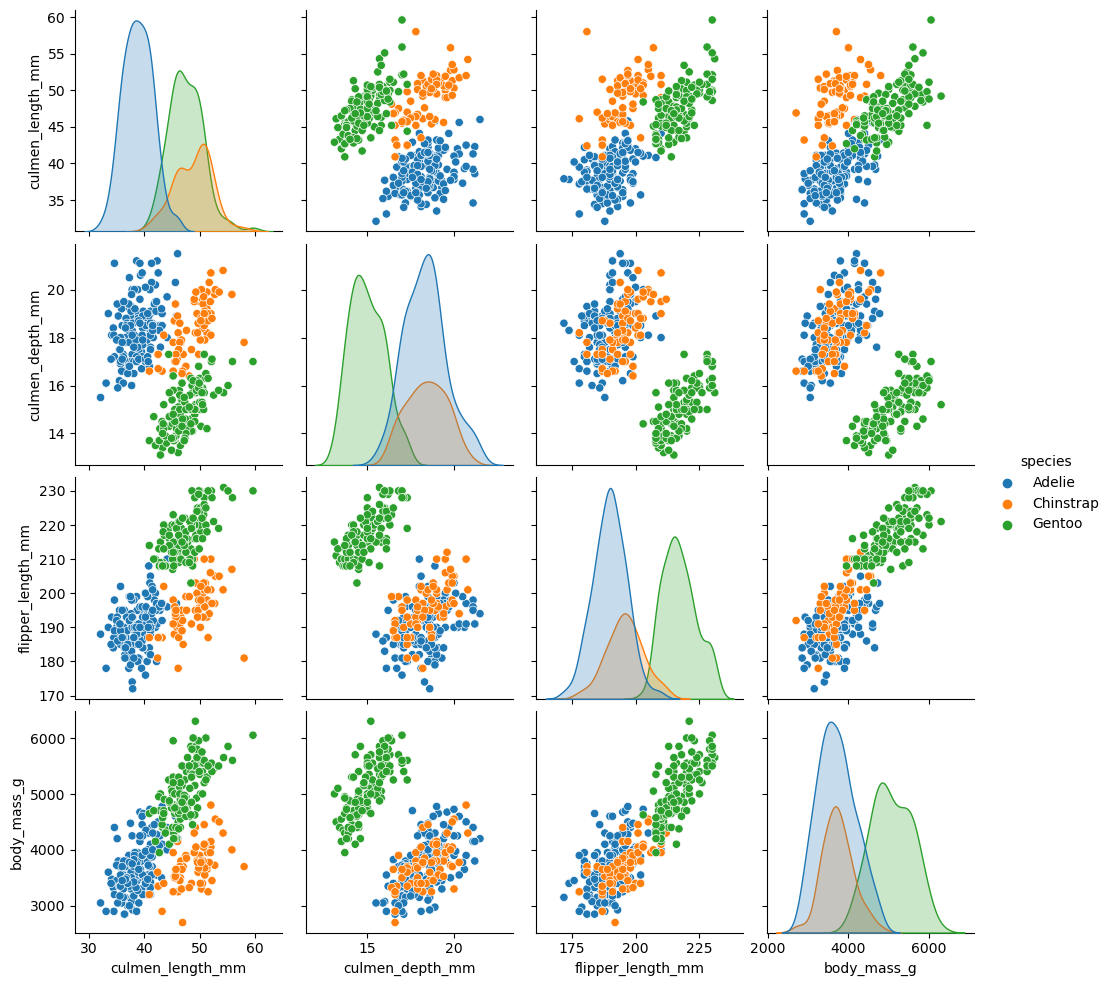

In [11]:
sns.pairplot(data=df,hue='species')

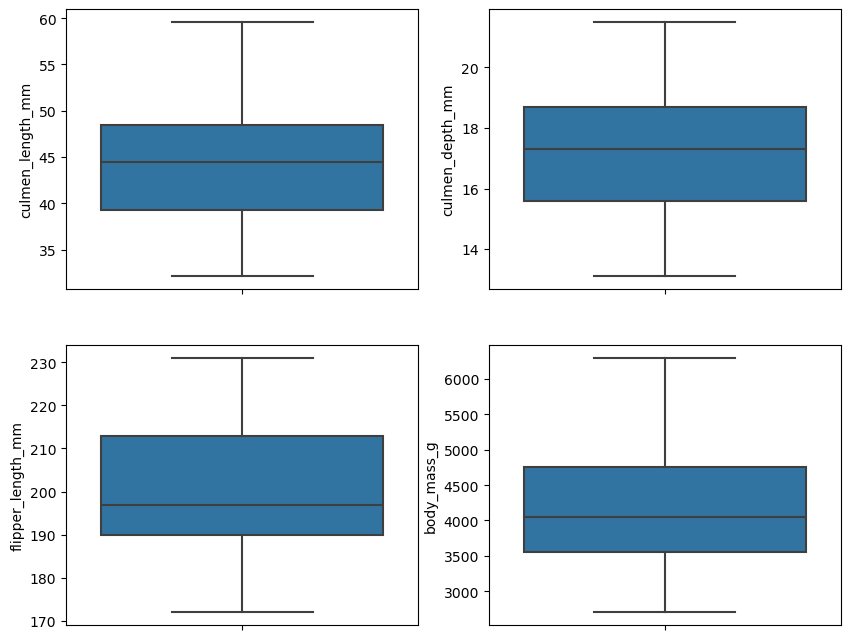

In [12]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, hue=df['species'], y=col, ax=axes[i])

## 데이터 전처리

In [13]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42,stratify=df['species']) 

train.shape, test.shape

((275, 7), (69, 7))

<Axes: >

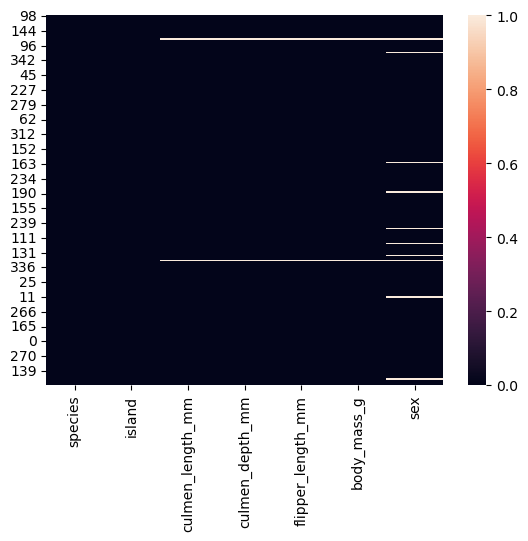

In [14]:
sns.heatmap(train.isna())

In [15]:
train = train.dropna()
train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Adelie,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,MALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
...,...,...,...,...,...,...,...
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,MALE
75,Adelie,Torgersen,42.8,18.5,195.0,4250.0,MALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 98 to 218
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            265 non-null    object 
 1   island             265 non-null    object 
 2   culmen_length_mm   265 non-null    float64
 3   culmen_depth_mm    265 non-null    float64
 4   flipper_length_mm  265 non-null    float64
 5   body_mass_g        265 non-null    float64
 6   sex                265 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.6+ KB


## x,y 분리

In [17]:
x_train = train.drop('species',axis=1)
y_train = train['species']

x_train.shape, y_train.shape

((265, 6), (265,))

In [18]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

x_train[object_cols] = oe.fit_transform(x_train[object_cols])

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_train_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

In [20]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
x_train_s = rs.fit_transform(x_train[num_cols])
x_train_s

array([[-1.31868132, -0.375     , -0.82608696, -0.92      ],
       [-0.6043956 ,  1.0625    , -0.26086957, -0.12      ],
       [-1.03296703, -0.09375   , -0.34782609, -0.56      ],
       ...,
       [-0.25274725,  0.375     , -0.08695652,  0.16      ],
       [-0.92307692,  0.46875   , -0.43478261, -0.2       ],
       [ 0.62637363,  0.53125   ,  0.56521739,  0.04      ]])

In [21]:
print(x_train_s.shape,y_train_e.shape)
print(type(x_train_s),type(y_train_e))


(265, 4) (265,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_s,y_train_e)

DecisionTreeClassifier(random_state=42)

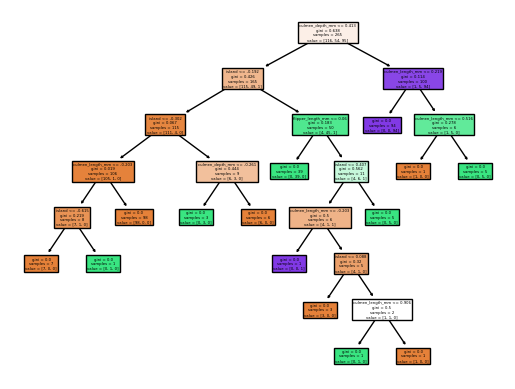

In [23]:
from sklearn.tree import plot_tree
plot_tree(clf,filled=True,feature_names=x_train.columns)
plt.show()

## 랜덤 포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=42)
clf2.fit(x_train_s,y_train_e)

RandomForestClassifier(random_state=42)

In [25]:
x_test = test.drop('species',axis=1)
y_test = test['species']

x_test.shape, y_test.shape

((69, 6), (69,))

In [26]:
x_test[object_cols] = oe.transform(x_test[object_cols])
x_test_s = rs.transform(x_test[num_cols])
y_test_e = le.transform(y_test)

In [27]:
x_test_s.shape,y_test_e.shape

((69, 4), (69,))

## Predict

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()


accuracy: 0.9855072463768116
recall: 0.9888888888888889
precision: 0.9871794871794872
f1 : 0.9878143347734575


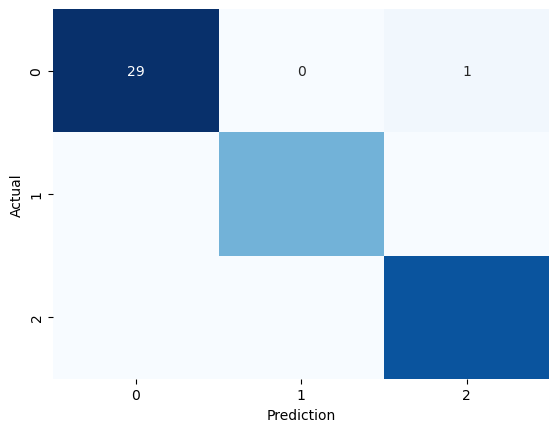

In [35]:
y_pred_1 = clf.predict(x_test_s)
print_metrics(y_test_e,y_pred_1,'macro')

In [33]:
y_pred_2 = clf2.predict(x_test_s)
print_metrics(y_test_e,y_pred_2,'macro')

accuracy: 0.9855072463768116
recall: 0.9888888888888889
precision: 0.9777777777777779
f1 : 0.9828560296123126
